# **IT606                 Akanksha Porwal                       202118017**

-What is Netflix?


Netflix is a subscription-based streaming service that allows members to watch TV shows and movies without commercials on an internet-connected device. You can also download TV shows and movies to your iOS, Android, or Windows 10 device and watch without an internet connection.This is an EDA or a story telling through its data along with a wide range of different graphs and visuals.

In [ ]:
#importing the relevent libraries

import numpy as np #for handling of random numbers,reshaping of matrices 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv),data analysis
import matplotlib.pyplot as plt#for plot or figure manipulation 
import seaborn as sns#library mostly used for statistical plotting ,provides beautiful styles and color palettes 
import warnings#lets the user indicate what should happen with different types of warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the Dataset

netflix_data = pd.read_csv('/content/netflix_titles.csv')
netflix_data.head()#to show first five rows of dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_data.info()#for more short summary set verbose = False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Inference:: Therefore, it is clear that the dataset contains 12 columns for exploratory analysis.

# **Data Cleaning**

To check nulls in the data


In [ ]:
netflix_data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
netflix_data.isna().sum()#to take sum of values which are null

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

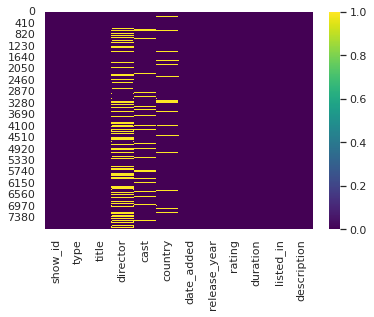

In [ ]:
sns.heatmap(netflix_data.isna(),cmap = 'viridis')

We have null values in director, cast,country,date_added and rating.So lets deal with it



In the above data, we can choose to drop the director and cast columns completely as they are not a huge part for us while we visualize the data and they dont add any significant value to our analysis. We are only focused on visualizing this data hence dropping two columns wont be any trouble for us.But this should not be a regular practise as if we are making a recommender system, we cannot drop the director and cast of a movie as these are a key feature used to recommend movies to users


3.   Country: this is an important information we will see later on how to fix it.
4.  date_added:there are just a few cases , so let's just scrap them.

5. rating:there are just a few cases , so let's just scrap them.







In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Drop director and cast column**

In [ ]:
netflix_data=netflix_data.drop(['director','cast'],axis=1)
netflix_data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Fix rating missings**

In [ ]:
netflix_data['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
netflix_data[netflix_data['rating'].isna()]#only NaN ratings would be displayed

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


We have TV-MA which is the most common rating and hence we can replace all these nan values with TV-MA.

In [ ]:
netflix_data['rating'] = netflix_data['rating'].fillna(netflix_data['rating'].mode()[0])#gets the mode(s) of each element along the axis selected ,there  can be more than 1 modes
    

**Fix date_added missings**

In [ ]:
netflix_data[netflix_data['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
netflix_data=netflix_data[netflix_data['date_added'].notna()]#putting only not null values back in our dataframe

**Fix country missing values**

We replaced all the Nan values in the country column with United States as Netflix was created in the USA and every show is aired on Netflix US. So instead of dropping the whole column we just replaced the values in it in order to save our data.

In [ ]:
netflix_data['country'] = netflix_data['country'].fillna(netflix_data['country'].mode()[0])#gets the mode(s) of each element along the axis selected ,there  can be more than 1 modes

**Check if data is cleaned**

In [ ]:
netflix_data.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
netflix_shows=netflix_data[netflix_data['type']=='TV Show']
#creating new columns for shows

In [ ]:
netflix_movies=netflix_data[netflix_data['type']=='Movie']
#creating new column for movies
netflix_movies.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


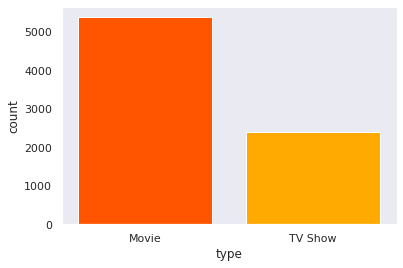

In [ ]:
sns.set(style="dark")#avaialable white, dark, whitegrid, darkgrid, ticks
ax=sns.countplot(x="type",data=netflix_data,palette="autumn",saturation=4)#countplot of seaborn library

*Inference* :- It is evident that there are more Movies on Netflix than TV shows.

In [ ]:
netflix_data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Year and month by adding date**

We are going to take the year and the month from date_added so we can compare wich are the most valueable months and the difference between Show realse and Netflix adding dates

In [ ]:
netflix_data['year_added'] = netflix_data['date_added'].apply(lambda x: x.split(" ")[-1])

In [ ]:
netflix_data['month_added']=netflix_data['date_added'].apply(lambda x:x.split(" ")[0])

**Shows targets based on rating**

This could be interesting to show which is target mostly focused by productions

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [ ]:
netflix_data['target_ages'] = netflix_data['rating'].replace(ratings_ages)
netflix_data['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

**Country Fixups**

There are some entry where country has multiple values. so i think i will add a new column with just the first one so we can check witch regions have more productions


In [ ]:
# Lets retrieve just the first country
netflix_data['principal_country'] = netflix_data['country'].apply(lambda x: x.split(",")[0])
netflix_data['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

**Fix Data Types**

In [ ]:
netflix_data.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [ ]:

# type should be a category
netflix_data['type'] = pd.Categorical(netflix_data['type'])
# target_ages is another category (4 classes)
netflix_data['target_ages'] = pd.Categorical(netflix_data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
netflix_data['year_added'] = pd.to_numeric(netflix_data['year_added'])


In [ ]:
netflix_data.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

In [ ]:
netflix_data['genre'] = netflix_data['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
netflix_data['genre'].head()

0    [International TV Shows, TV Dramas, TV Sci-Fi ...
1                       [Dramas, International Movies]
2                [Horror Movies, International Movies]
3    [Action & Adventure, Independent Movies, Sci-F...
4                                             [Dramas]
Name: genre, dtype: object


## *Data Visualization *

We have now dealt with all of our missing data so lets get started with our data visualization

In [ ]:
netflix_data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,genre
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,Brazil,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico,"[Dramas, International Movies]"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore,"[Horror Movies, International Movies]"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United States,"[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United States,[Dramas]


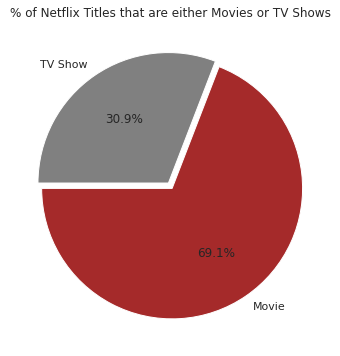

In [ ]:
plt.figure(figsize=(12,6))#The purpose of using plt.figure () is to create a figure object
plt.title("% of Netflix Titles that are either Movies or TV Shows")
plt.pie(netflix_data.type.value_counts(), explode=(0.025,0.025), labels=netflix_data.type.value_counts().index, colors=['Brown','Grey'],autopct='%1.1f%%', startangle=180);
plt.show()

We can see that 30.9% of Netflix titles are TV Shows and 69.1% are Movies

## **Let's see which month directors prefer most to release their Movies & Tv Shows**

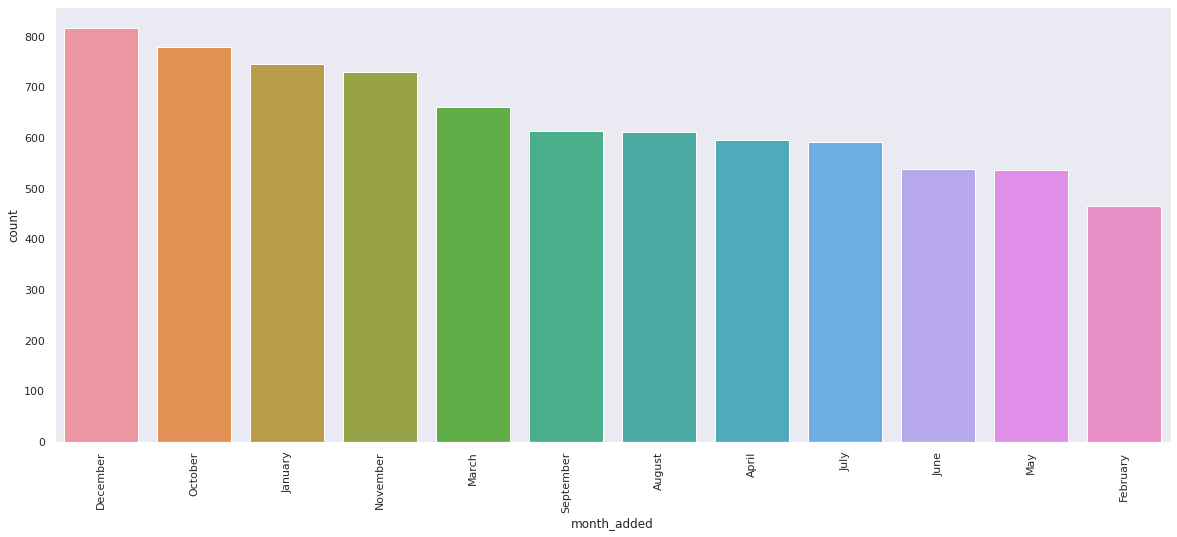

In [ ]:
# sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x='month_added',data= netflix_data,order = netflix_data['month_added'].value_counts().index[0:12])
plt.xticks(rotation=90)
plt.show()

Most of the directors prefer to release their Movies & Tv Shows in December.Since December is the Month of Vacations

## **Which state provides the highest number of movies/TV Shows?**

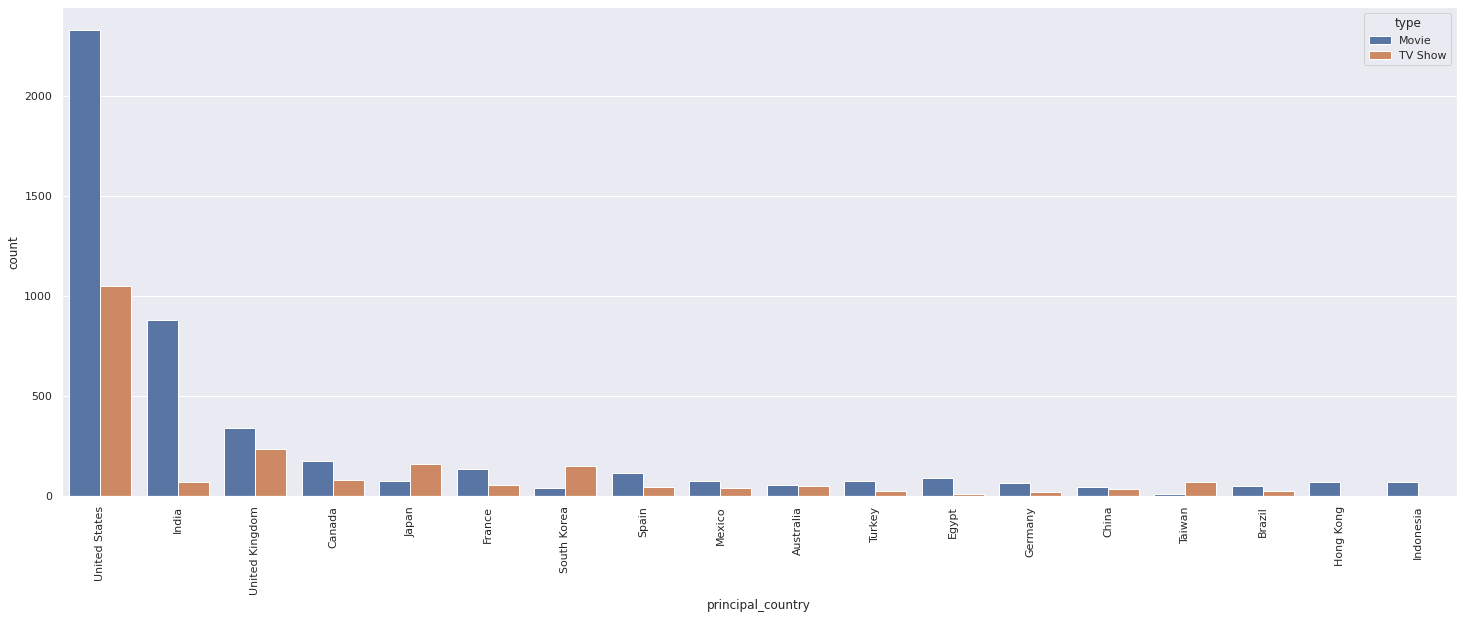

In [ ]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="principal_country",data= netflix_data,hue= "type",order = netflix_data['principal_country'].value_counts().index[0:18])
plt.xticks(rotation=90)
plt.show()

So United States provides the Highest number of Movies & Tv Shows,then at 2nd place India provides the Highest number of Movies

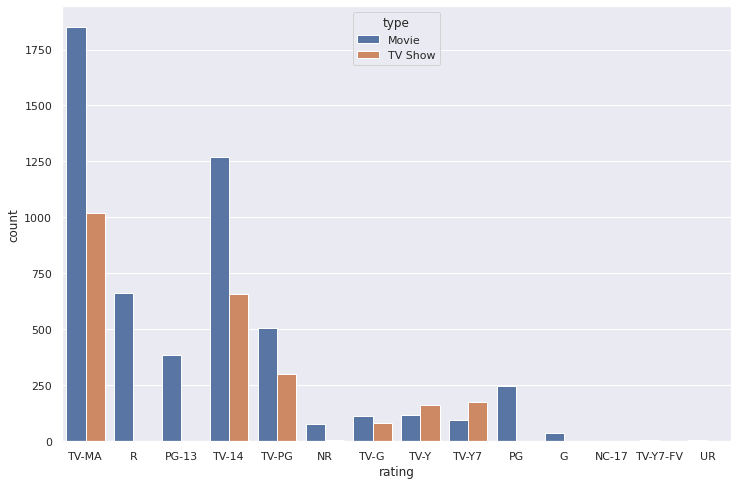

In [ ]:

plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = netflix_data,hue='type')

In [ ]:
import plotly.express as px

top_listed_in=netflix_data["genre"].value_counts()[0:25]
fig = px.pie(netflix_data,values = top_listed_in,names = top_listed_in.index,labels= top_listed_in.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

Netflix provides "Documentry" type Movies & TvShows most then in the 2nd place it provides Stand Up Comedy most.

## **Movie ratings analysis**





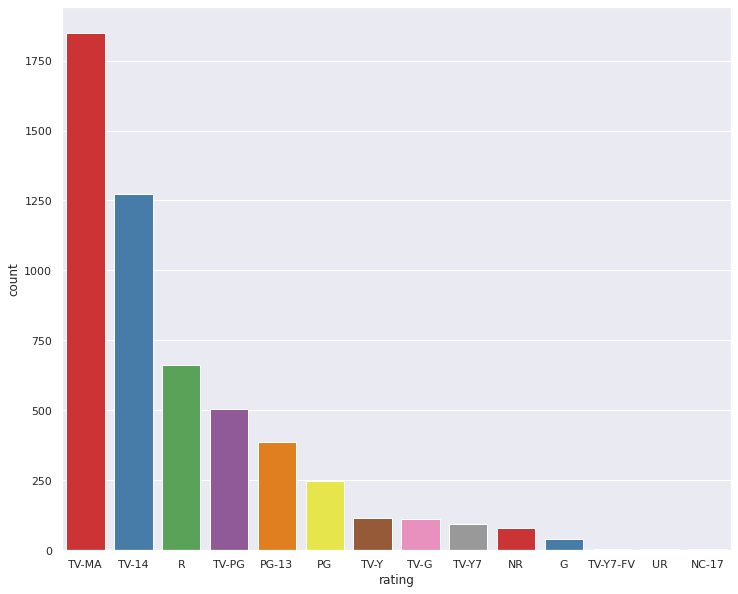

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set1", order=netflix_movies['rating'].value_counts().index[0:15])#The value_counts function returns the count of all unique values in the given index in descending order without any null values

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

#**Oldest Movies available on netflix**

In [ ]:
old = netflix_data.sort_values("release_year", ascending = True) 
old[['title', 'type','country',"release_year"]][:15]

,title,type,country,release_year
4867,Pioneers: First Women Filmmakers*,TV Show,United States,1925
6117,The Battle of Midway,Movie,United States,1942
4960,Prelude to War,Movie,United States,1942
7679,WWII: Report from the Aleutians,Movie,United States,1943
7616,Why We Fight: The Battle of Russia,Movie,United States,1943
7342,Undercover: How to Operate Behind Enemy Lines,Movie,United States,1943
6657,The Memphis Belle: A Story of a\nFlying Fortress,Movie,United States,1944
6699,The Negro Soldier,Movie,United States,1944
7268,Tunisian Victory,Movie,"United States, United Kingdom",1944
3425,Know Your Enemy - Japan,Movie,United States,1945


All of the oldest Movies & TV Shows on Netflix are from United States

## **Total shows by a particular country**

In [ ]:
Country = pd.DataFrame(netflix_data["country"].value_counts().reset_index().values,columns=["country","TotalShows"])
Country.head()

,country,TotalShows
0,United States,3055
1,India,923
2,United Kingdom,396
3,Japan,225
4,South Korea,183


In [ ]:
import plotly.express as px
data = dict(
    number=[3055,923,396,225,183],
    country=["United States", "India", "United Kingdom","Japan",'South Korea'])
fig = px.funnel(data, x='number', y='country')
fig.show()


## **Year wise analysis**

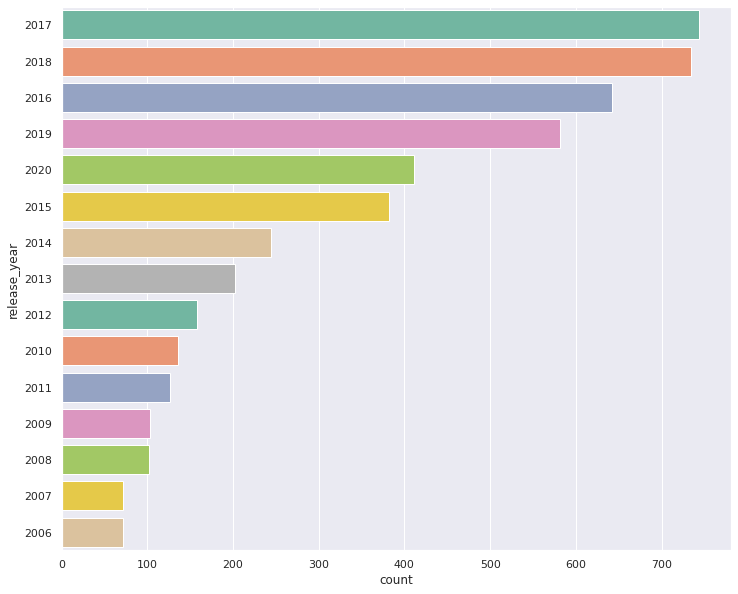

In [ ]:
plt.figure(figsize=(12,10))#to change the size of the plot
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

So, 2017 was the year when most of the movies were released.

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

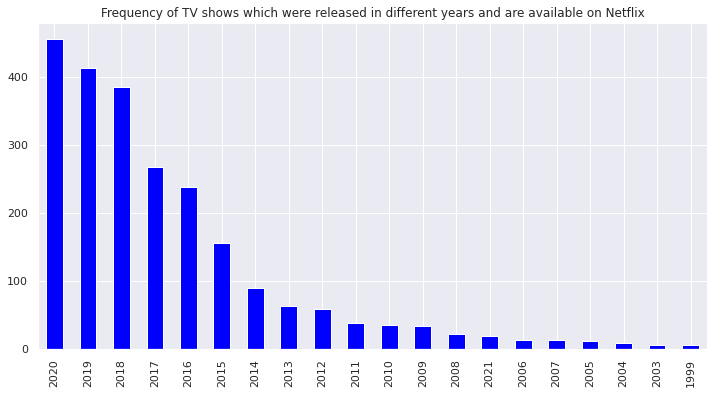

In [ ]:
plt.figure(figsize=(12,6))
netflix_data[netflix_data["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Blue")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

# **Word Cloud**

In [ ]:
from wordcloud import WordCloud# a word cloud is a visual representation of text that’s based on the frequency with which a particular word appears

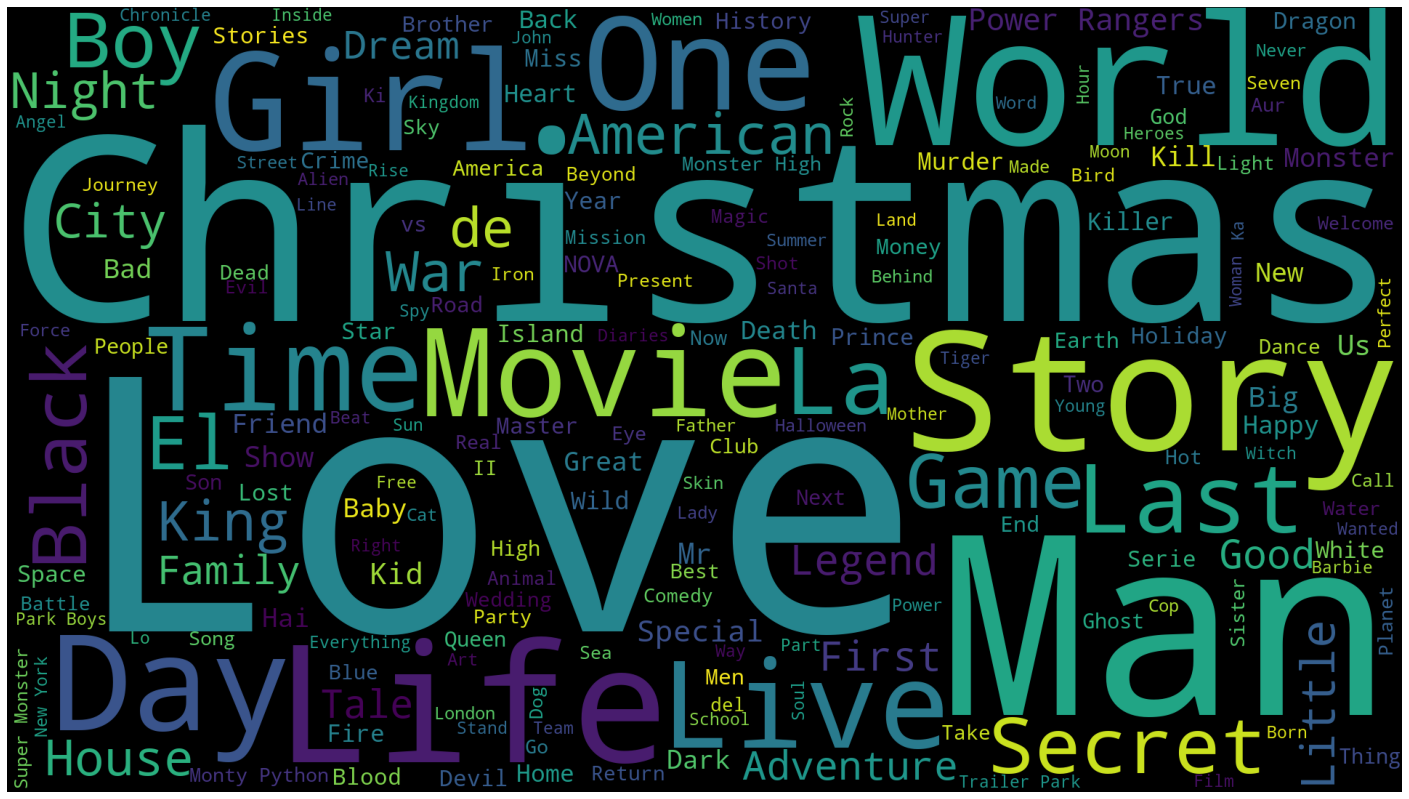

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix_data.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

In [ ]:
netflix_movies['duration']=netflix_movies['duration'].str.replace('min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

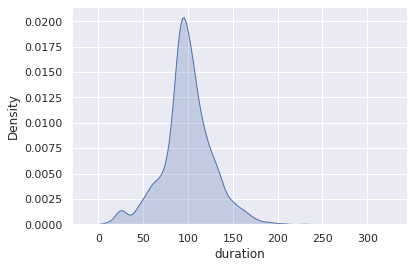

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.

# **TV shows with largest number of seasons**

In [ ]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

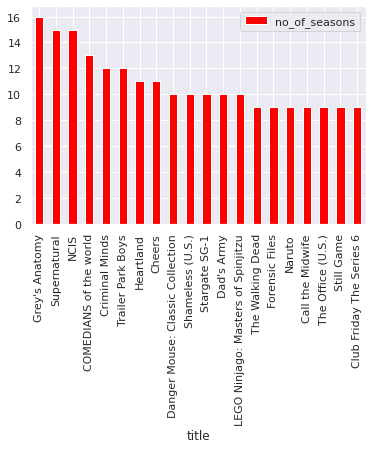

In [ ]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

Thus, NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons.

## **Lowest number of seasons.**

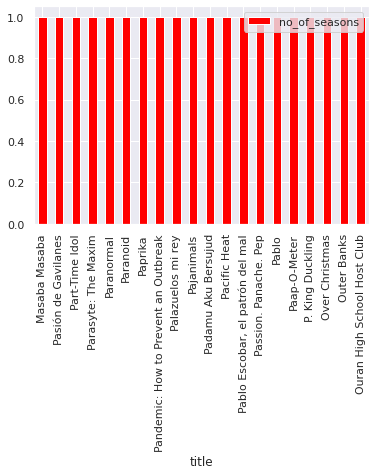

In [ ]:
t=['title','no_of_seasons']
low=durations[t]

low=low.sort_values(by='no_of_seasons', ascending=True)
lows=low[0:20]
lows.plot(kind='bar',x='title',y='no_of_seasons', color='red')

In [ ]:
#These are some binge-worthy shows that are short and have only one season.

# **Top Duration**

In [ ]:
import plotly.graph_objects as go
topdirs=pd.value_counts(netflix_data['duration'])
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values , text=topdirs.values,marker_color='indianred')])
fig.update_traces(textposition='outside')
fig.show()

It can be inferred that having one season is the most preferred duration.

## **THANK YOU! **
                -Akanksha Porwal 